<h1>Loan Approval Prediction Project</h1>

<h2>Lifecycle of Machine Learning Project</h2>

1. Understanding of problem Statement
2. Data Collection
3. Data checks for performance
4. Exploratory Data Analysis
5. Data Pre Processing
6. Model Training
7. Choose Best Model

<h3>1. Understanding of Problem Statment</h3>

The company seeks to automate (in real time) the loan approval procedure based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval in accelerating decision-making process for determining whether an applicant is eligible for a loan or not.

<h3>2. Data Collection</h3>

Data is collected from AWS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"D:\DS_Stats\E2E_DS_Propjects\Loan-Approval-Prediction-Project\raw_data\LoansTrainingSetV2 (1).csv")

In [3]:
df.shape

(111107, 19)

The data consists of 111107 rows and 19 columns

In [4]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

The data has 9 Categorical Features and 10 Numerical Features

<h3>3. Performing Data Check</h3>

- Check for missing values
- Check Duplicates
- Check Datatypes
- Check number of unique values in a column
- Check statistics of data set
- Check Various categories present in different categorical columns

<h4> 3.1 Check for Missing Values

<Axes: >

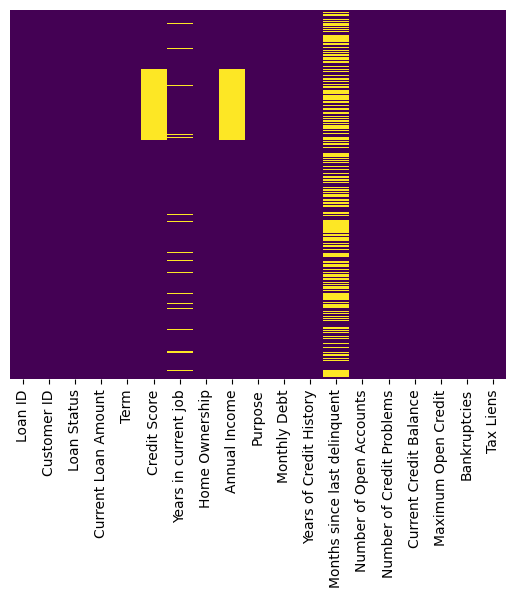

In [6]:
sns.heatmap(data=df.isnull(),cbar=False,cmap='viridis',yticklabels=False)

In [7]:
null_percentage= df.isnull().sum() / df.shape[0] * 100
columns_with_null = null_percentage[null_percentage > 0]
print(columns_with_null)

Credit Score                    19.204911
Years in current job             4.223856
Annual Income                   19.204911
Months since last delinquent    53.104665
Bankruptcies                     0.205208
Tax Liens                        0.009900
dtype: float64


We can see that 6 columns have null valus with null percentage ranging from 0.009% to 53%

<h4>3.2 Check Duplicates

In [8]:
df.duplicated().sum()

5869

There 5869 rows with dupliate values where all the compones in the entry is duplicate of another entry

In [9]:
df_col_2_duplicate = df[df['Customer ID'].duplicated()==True]
df_col_2_duplicate.shape

(22197, 19)

In [10]:
df_col_1_duplicate = df[df['Loan ID'].duplicated()==True]
df_col_1_duplicate.shape

(22197, 19)

On deeper analysis it was found there are 22197 duplicate entries with same Loan ID and Customer ID. This needs to be removed to reduce overfitting and bias in model. 

In [11]:
df.shape

(111107, 19)

In [12]:

df_duplicates_removed = df.drop_duplicates(subset='Loan ID',keep='first',inplace=False)

In [13]:
df_duplicates_removed.shape

(88910, 19)

22197 duplicate records removed from the data

<h4>3.3 Check Datatypes of Features

In [14]:
column_datatypes = df_duplicates_removed.dtypes
print(column_datatypes)


Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Years in current job             object
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                     object
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit              object
Bankruptcies                    float64
Tax Liens                       float64
dtype: object


In [15]:
categorical_features = [feature for feature in df_duplicates_removed.columns if df_duplicates_removed[feature].dtype =='O' ]
numerical_features = [feature for feature in df_duplicates_removed.columns if df_duplicates_removed[feature].dtype !='O' ]

In [16]:
print(f'We have {len(categorical_features)} Categorical Feature which are : {categorical_features}')
print(f'\nWe have {len(numerical_features)} Categorical Feature which are : {numerical_features}')

We have 9 Categorical Feature which are : ['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt', 'Maximum Open Credit']

We have 10 Categorical Feature which are : ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Bankruptcies', 'Tax Liens']


<h4>3.4 Check for Unique Values in Feature

In [17]:
df_duplicates_removed.nunique()

Loan ID                         88910
Customer ID                     88910
Loan Status                         2
Current Loan Amount             22081
Term                                2
Credit Score                      326
Years in current job               11
Home Ownership                      4
Annual Income                   36344
Purpose                            16
Monthly Debt                    76609
Years of Credit History           508
Months since last delinquent      116
Number of Open Accounts            52
Number of Credit Problems          14
Current Credit Balance          33716
Maximum Open Credit             58216
Bankruptcies                        8
Tax Liens                          13
dtype: int64

<h4>3.5 Check Statistic for Numerical Features

In [18]:
df_duplicates_removed.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,8.891000e+04,67572.000000,6.757200e+04,88910.000000,40404.000000,88910.000000,88910.000000,8.891000e+04,88718.000000,88902.000000
mean,1.433878e+07,1199.199580,7.234575e+04,18.315313,35.080289,11.110348,0.160477,1.543593e+04,0.112672,0.028222
std,3.502996e+07,1680.813805,5.836101e+04,7.049175,22.008583,4.978461,0.473746,1.965873e+04,0.343300,0.257533
min,4.910000e+02,585.000000,4.033000e+03,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.283000e+03,714.000000,4.458600e+04,13.500000,16.000000,8.000000,0.000000,5.949000e+03,0.000000,0.000000
50%,1.435500e+04,733.000000,6.149400e+04,17.000000,32.000000,10.000000,0.000000,1.103900e+04,0.000000,0.000000
75%,2.448500e+04,744.000000,8.675025e+04,21.800000,51.000000,14.000000,0.000000,1.930100e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,15.000000,1.730472e+06,7.000000,15.000000


<h4>3.6 Check for various categories present in categorical feature

In [19]:
for feature in categorical_features:
    unique_category = df_duplicates_removed[feature].unique()
    print(f'\nCategories in {feature} are {unique_category}')


Categories in Loan ID are ['6cf51492-02a2-423e-b93d-676f05b9ad53'
 '552e7ade-4292-4354-9ff9-c48031697d72'
 '9b5e32b3-8d76-4801-afc8-d729d5a2e6b9' ...
 'd43b4c9c-8cb9-4cff-b86c-84b4f2c6aa13'
 'e3ffa0d5-5164-4815-9231-7ae5e0887dfd'
 '26e3e4f3-7442-4b68-bc2b-a9c4567f67ce']

Categories in Customer ID are ['7c202b37-2add-44e8-9aea-d5b119aea935'
 'e7217b0a-07ac-47dd-b379-577b5a35b7c6'
 '0a62fc41-16c8-40b5-92ff-9e4b763ce714' ...
 '5dc48d5a-36e9-4e52-9568-d81f218386b0'
 '2bfeb5be-6441-4e2d-be6e-20a138127d93'
 '5514bfcc-e996-4d9b-80d4-9ea66dfa1ac5']

Categories in Loan Status are ['Loan Refused' 'Loan Given']

Categories in Term are ['Short Term' 'Long Term']

Categories in Years in current job are ['< 1 year' '10+ years' '9 years' '3 years' '2 years' '7 years' '6 years'
 '1 year' '5 years' '4 years' '8 years' nan]

Categories in Home Ownership are ['Rent' 'Home Mortgage' 'Own Home' 'HaveMortgage']

Categories in Purpose are ['Debt Consolidation' 'Home Improvements' 'other' 'Business Loan'
 's

It seems Monthly Debt and Maximum Open Credit have numerical values but the datatype is object. We will convert these feature to float datatype

In [20]:
df_duplicates_removed['Monthly Debt'] = df_duplicates_removed['Monthly Debt'].str.replace('$','')

In [21]:
df_duplicates_removed['Monthly Debt'] = df_duplicates_removed['Monthly Debt'].astype(float)

In [22]:
df_duplicates_removed['Maximum Open Credit'] = pd.to_numeric(df_duplicates_removed['Maximum Open Credit'], errors='coerce')

In [23]:
df_duplicates_removed['Maximum Open Credit'] = df_duplicates_removed['Maximum Open Credit'].astype(float)

In [24]:
categorical_features = [feature for feature in df_duplicates_removed.columns if df_duplicates_removed[feature].dtype =='O' ]
numerical_features = [feature for feature in df_duplicates_removed.columns if df_duplicates_removed[feature].dtype !='O' ]

print(f'We have {len(categorical_features)} Categorical Feature which are : {categorical_features}')
print(f'\nWe have {len(numerical_features)} Categorical Feature which are : {numerical_features}')

We have 7 Categorical Feature which are : ['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']

We have 12 Categorical Feature which are : ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']


In [25]:
for feature in categorical_features:
    unique_category = df_duplicates_removed[feature].unique()
    print(f'\nCategories in {feature} are {unique_category}')


Categories in Loan ID are ['6cf51492-02a2-423e-b93d-676f05b9ad53'
 '552e7ade-4292-4354-9ff9-c48031697d72'
 '9b5e32b3-8d76-4801-afc8-d729d5a2e6b9' ...
 'd43b4c9c-8cb9-4cff-b86c-84b4f2c6aa13'
 'e3ffa0d5-5164-4815-9231-7ae5e0887dfd'
 '26e3e4f3-7442-4b68-bc2b-a9c4567f67ce']

Categories in Customer ID are ['7c202b37-2add-44e8-9aea-d5b119aea935'
 'e7217b0a-07ac-47dd-b379-577b5a35b7c6'
 '0a62fc41-16c8-40b5-92ff-9e4b763ce714' ...
 '5dc48d5a-36e9-4e52-9568-d81f218386b0'
 '2bfeb5be-6441-4e2d-be6e-20a138127d93'
 '5514bfcc-e996-4d9b-80d4-9ea66dfa1ac5']

Categories in Loan Status are ['Loan Refused' 'Loan Given']

Categories in Term are ['Short Term' 'Long Term']

Categories in Years in current job are ['< 1 year' '10+ years' '9 years' '3 years' '2 years' '7 years' '6 years'
 '1 year' '5 years' '4 years' '8 years' nan]

Categories in Home Ownership are ['Rent' 'Home Mortgage' 'Own Home' 'HaveMortgage']

Categories in Purpose are ['Debt Consolidation' 'Home Improvements' 'other' 'Business Loan'
 's

<h3>4 Exploratory Data Analysis(EDA)

<h4>4.1 Visualisation of Loan Status(Target Feature)

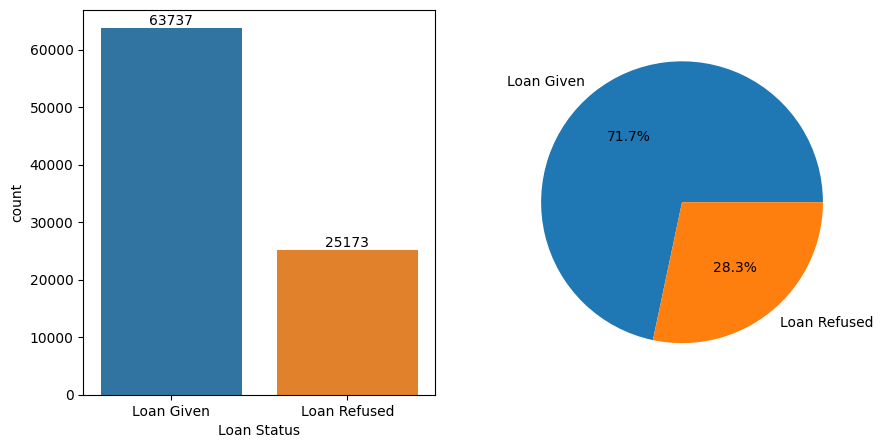

In [26]:
status = df_duplicates_removed['Loan Status'].value_counts()
f,ax = plt.subplots(1,2,figsize = (10,5))
sns.countplot(x=df_duplicates_removed['Loan Status'],ax=ax[0],data=df_duplicates_removed,order=df_duplicates_removed['Loan Status'].value_counts().index)
for container in ax[0].containers:
    ax[0].bar_label(container,color = 'black',size=10)
plt.pie(x=df_duplicates_removed['Loan Status'].value_counts(),labels=df_duplicates_removed['Loan Status'].value_counts().index,autopct='%1.1f%%')
plt.show()

No. of Loans Given is 2.5 times more than no. of Loan Refused. This makes the data bias as more number of records are present for Loan Given status.

<h4>4.2 Visualisation of Numerical Categories via Histplot

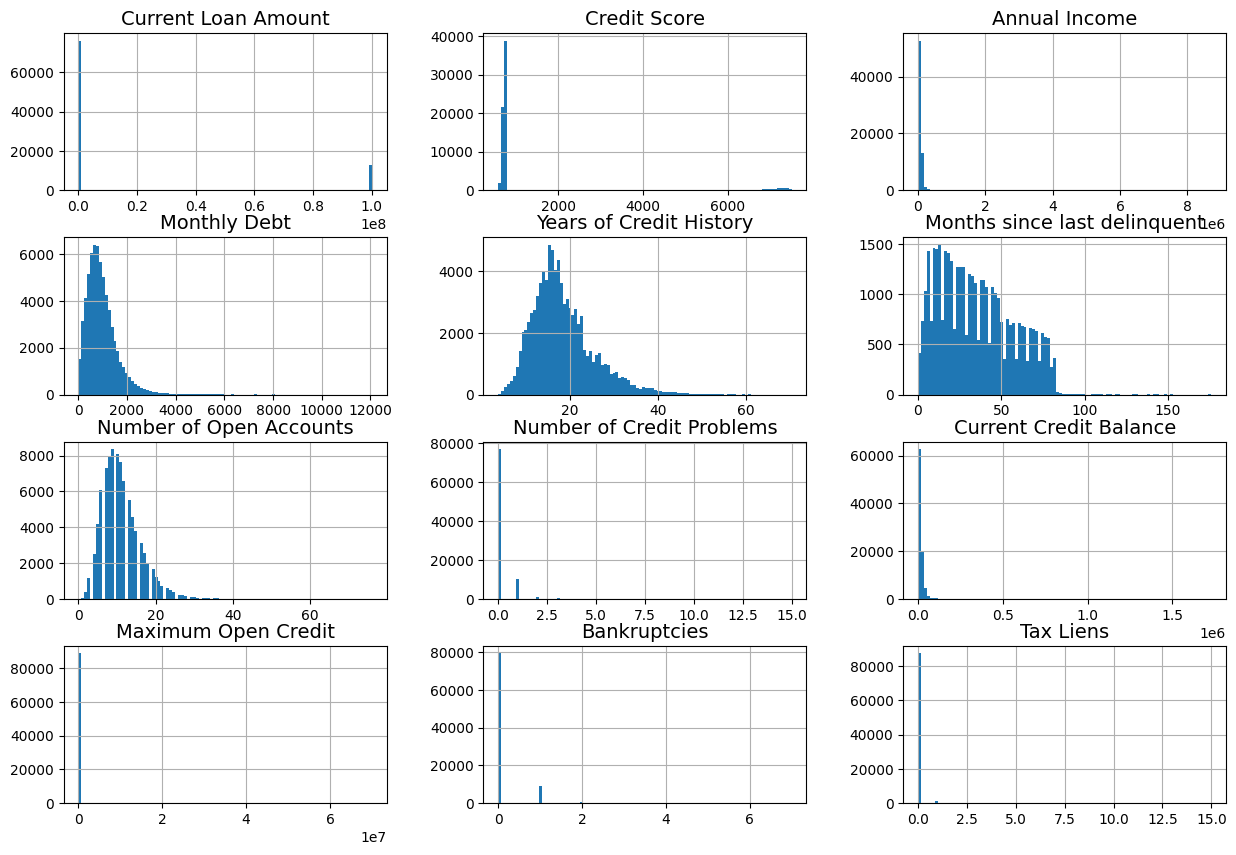

In [27]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed.hist(bins=100, figsize=(15, 10), )
plt.show()

Number of Open Accounts, Monthly Debt, Years of Credit History have as good distribution. Which can be converted to nornal distribution easily

<h4>4.3 Featurewise Analysis

<h5>4.3.1 Current Loan Amount

- How is Current Loan Amount Distributed?
- Does Current Loan Amount have any impact on Loan Status?

Univatriate Analysis

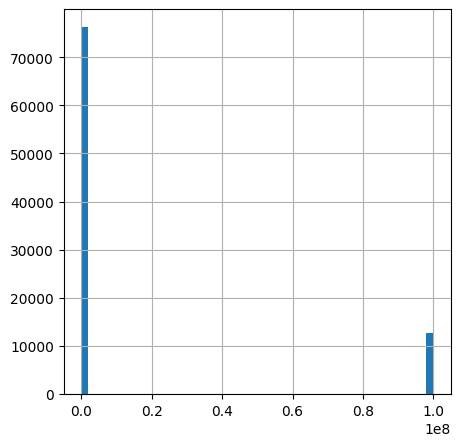

In [28]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Current Loan Amount'].hist(bins=50, figsize=(5, 5), )
plt.show()

It seems there is are outliers in the current loan amount which is  making the plot very skewed. Lets correct the outliers first

In [29]:
df_duplicates_removed['Current Loan Amount'].value_counts().sort_values()

6623            1
11000           1
3798            1
10517           1
18613           1
            ...  
10096          22
10156          23
8066           23
10151          25
99999999    12738
Name: Current Loan Amount, Length: 22081, dtype: int64

In [30]:
Q1 = df_duplicates_removed['Current Loan Amount'].quantile(0.25)
Q3 = df_duplicates_removed['Current Loan Amount'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
outliers = df_duplicates_removed["Current Loan Amount"][
    (df_duplicates_removed["Current Loan Amount"] < (Q1 - 1.5 * IQR)) |
    (df_duplicates_removed["Current Loan Amount"] > (Q3 + 1.5 * IQR))
]

16202.0


In [31]:
outliers.min()

99999999

In [32]:
outliers.value_counts()

99999999    12738
Name: Current Loan Amount, dtype: int64

There are 12738 loans which have outliers.

In [33]:
filtered_df = df_duplicates_removed[df_duplicates_removed["Current Loan Amount"] > (Q3 + 1.5 * IQR)]

#to Understand if these are new to credit of have credit history
grouped_df = filtered_df.groupby('Years of Credit History')['Current Loan Amount'].value_counts()  

print(grouped_df)


Years of Credit History  Current Loan Amount
3.8                      99999999               2
4.0                      99999999               1
4.2                      99999999               4
4.4                      99999999               1
4.5                      99999999               2
                                               ..
52.9                     99999999               1
53.1                     99999999               1
55.8                     99999999               1
57.7                     99999999               1
59.5                     99999999               1
Name: Current Loan Amount, Length: 431, dtype: int64


All these loan have atleast 3.8 Years of credit history. That means they are not new to credit

Let check what is the porpose of taking these loans.

In [34]:
filtered_df_1 = df_duplicates_removed[df_duplicates_removed["Current Loan Amount"] > (Q3 + 1.5 * IQR)]

#to Understand if they have any credit balance
grouped_df_1 = filtered_df_1.groupby('Purpose')['Current Loan Amount'].value_counts().sort_values(ascending=False)  

print(grouped_df_1)


Purpose               Current Loan Amount
Debt Consolidation    99999999               10047
Home Improvements     99999999                 779
other                 99999999                 693
Other                 99999999                 436
Buy a Car             99999999                 202
Medical Bills         99999999                 145
Business Loan         99999999                 138
Buy House             99999999                  79
Take a Trip           99999999                  68
major_purchase        99999999                  54
small_business        99999999                  30
moving                99999999                  22
wedding               99999999                  22
Educational Expenses  99999999                  15
vacation              99999999                   8
Name: Current Loan Amount, dtype: int64


For 78% of the percent of the outlier cases the purpose of taking a new loan is "Debt Consolidation". This is the act of using a new loan to pay off older debts and liabilities. Hence for these cases we can impute median current loan amount.

In [35]:
grouped_df_2 = df_duplicates_removed.groupby('Purpose')['Current Loan Amount'].median()  
grouped_df_2

Purpose
Business Loan           15181.0
Buy House               14709.0
Buy a Car                7874.0
Debt Consolidation      14921.0
Educational Expenses     7705.0
Home Improvements       14246.5
Medical Bills            8111.0
Other                    9786.5
Take a Trip              5977.0
major_purchase           9937.5
moving                   8042.5
other                    9437.0
renewable_energy         8206.0
small_business          15213.0
vacation                 6037.5
wedding                 10183.0
Name: Current Loan Amount, dtype: float64

We will replace the outliers with the median current loan amount of same Purpose

In [36]:
def replace_value(x):
    if x >99999998:
        median_loan_amount = df_duplicates_removed.loc[df_duplicates_removed['Purpose']==x,'Current Loan Amount'].median()
        return median_loan_amount
    else:
        return x

In [37]:
df_duplicates_removed['Current Loan Amount'] = df_duplicates_removed['Current Loan Amount'].apply(replace_value)

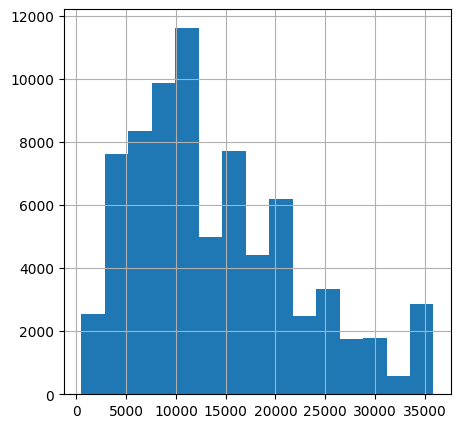

In [38]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Current Loan Amount'].hist(bins=15, figsize=(5, 5) )
plt.show()

<Axes: xlabel='Current Loan Amount', ylabel='Count'>

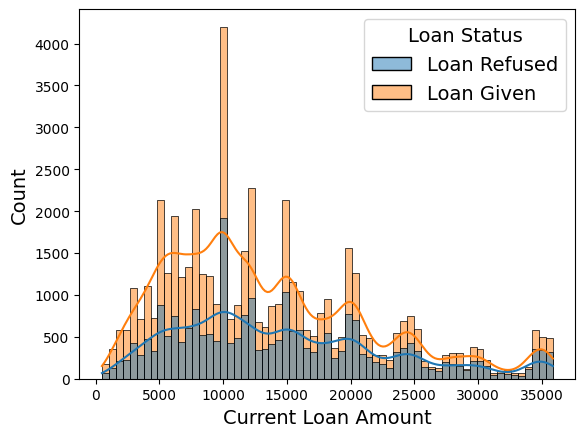

In [39]:
sns.histplot(data=df_duplicates_removed,x = df_duplicates_removed['Current Loan Amount'],kde=True,hue='Loan Status')

We can see that Current Loan Amount does not have to much impact on loan status as loan given vs loan rejected has almost same ration in every bin

<h5>4.3.2 Term

- How is Term Distributed?
- Does Term have any impact on Loan Status?

UNIVARIATE ANALYSIS

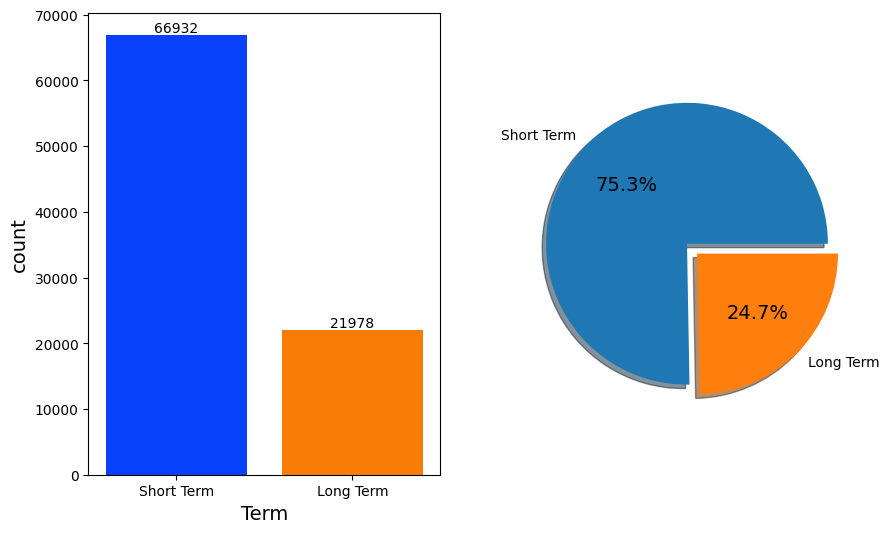

In [40]:
f,ax = plt.subplots(1,2,figsize = (10,6))
sns.countplot(x= df_duplicates_removed['Term'],data = df_duplicates_removed,palette = 'bright',ax=ax[0],saturation=0.95,order = df_duplicates_removed['Term'].value_counts().index)
for container in ax[0].containers:
    ax[0].bar_label(container,color = 'black',size=10)

plt.pie(x=df_duplicates_removed['Term'].value_counts(),labels=df_duplicates_removed['Term'].value_counts().index,explode= [0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

Insights - Sthort Tearm Loans are much more applied than long term loans

BIVARIATE ANALYSIST WITH DEPENDANT VARIABLE

In [41]:
term_crosstabs = pd.crosstab(df_duplicates_removed['Loan Status'], df_duplicates_removed['Term'])


percentages = term_crosstabs.div(term_crosstabs.sum(axis=0), axis=1) * 100

print("Percentage cross-tabulation:")
print(percentages)


Percentage cross-tabulation:
Term          Long Term  Short Term
Loan Status                        
Loan Given    57.848758     76.2311
Loan Refused  42.151242     23.7689


Comparision Between Loan Status and Term


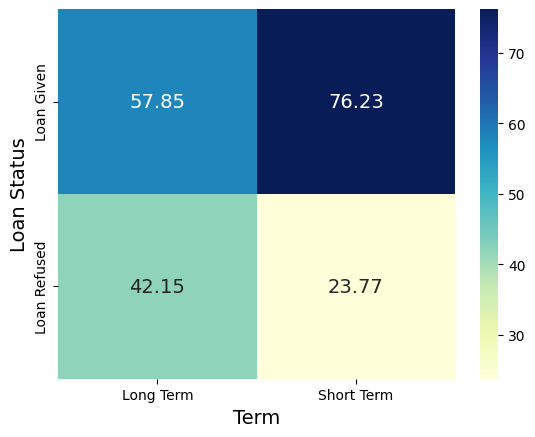

In [42]:
print('Comparision Between Loan Status and Term')

sns.heatmap(percentages,annot=True,cmap="YlGnBu",fmt='1.2f')
plt.show()

Insights: % of rejection in long term loan is more than short term loans

<h5>4.2.3 Credit Score

- How Credit Score is distributed?
- what is the effect of credit score with loan status?

UNIVARIATE ANALYSIS

<Axes: xlabel='Credit Score'>

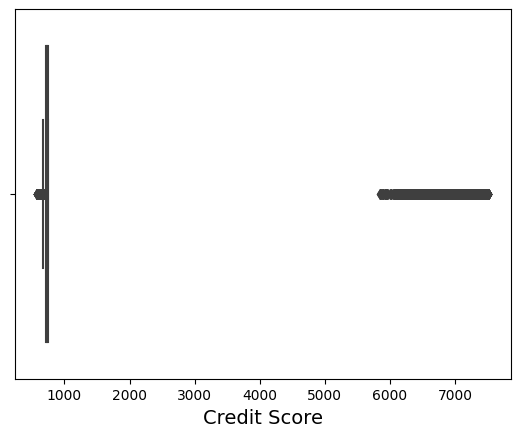

In [43]:
# Outliers Checking and Handeling

sns.boxplot(data=df_duplicates_removed,x='Credit Score')

In [44]:
df_duplicates_removed[df_duplicates_removed['Credit Score'] > 800]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232.0,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946.0,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014.0,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961.0,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117.0,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815.0,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716.0,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533.0,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789.0,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,dddda579-91fc-479b-98b7-e035de24e924,fcd51025-8954-4b5b-816f-39cb1e66fc1f,Loan Refused,19874.0,Long Term,7010.0,6 years,Own Home,54654.0,Debt Consolidation,1202.38,14.3,NaN,15,0,21693,25949.0,0.0,0.0
5040,5154e83f-4f72-431b-b6e5-c5a94f08a74a,dd2602f3-fba7-4a44-b2c6-2e722638838a,Loan Refused,11199.0,Short Term,7180.0,3 years,Rent,40176.0,Debt Consolidation,736.56,8.8,NaN,17,0,5674,14079.0,0.0,0.0
5041,bebce2e5-bd21-4f6b-a5df-0e042b17ad24,9cd162b4-defa-4ab7-b5c4-252ff1be0e0c,Loan Refused,12072.0,Long Term,7110.0,5 years,Home Mortgage,130780.0,Debt Consolidation,1547.56,9.8,NaN,17,0,18863,21532.0,0.0,0.0
5042,031a7b4f-2b0f-4f09-97c0-942da5ec7d98,d22f8176-c506-4fba-b8b9-fb97a47a7cd2,Loan Refused,5612.0,Short Term,7330.0,10+ years,Rent,68915.0,Debt Consolidation,1349.58,15.6,NaN,14,1,2262,12927.0,1.0,0.0


Seeing the credit score it seems that extra 0 is added in the credit score.

In [45]:
df_duplicates_removed['Credit Score'] = np.where(df_duplicates_removed['Credit Score'] >800, df_duplicates_removed['Credit Score']/10,df_duplicates_removed['Credit Score'])

<Axes: xlabel='Credit Score'>

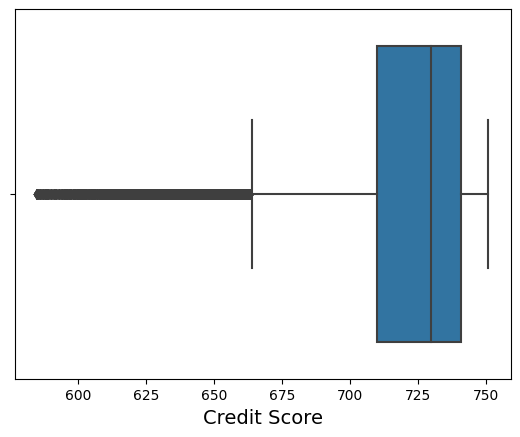

In [46]:
sns.boxplot(data=df_duplicates_removed,x='Credit Score')

In [47]:
df_duplicates_removed['Credit Score'].isnull().sum()

21338

There are 21383 records where Credit Score is Null. We will replace it by median credit scores of group made from Number of Credit Problems. This is done because if credit problems is there then Credit Score will decrease

In [48]:

median_credit_score_by_problems = df_duplicates_removed.groupby('Number of Credit Problems')['Credit Score'].median()


#df_duplicates_removed['Credit Score'].fillna(median_credit_score_by_problems, inplace=True)


In [49]:
median_credit_score_by_problems

Number of Credit Problems
0     731.0
1     726.0
2     722.0
3     724.0
4     718.0
5     719.5
6     724.0
7     716.0
8     714.5
9     718.0
10    742.0
11    696.0
12    720.0
15    746.0
Name: Credit Score, dtype: float64

In [50]:
def impude_credit_score(cols):
    credit_score = cols[0]
    credit_problem = cols[1]
    if pd.isnull(credit_score):
        if credit_problem == 0:
            return 731
        elif credit_problem == 1:
            return 726
        elif credit_problem == 2:
            return 722
        elif credit_problem == 3:
            return 724
        elif credit_problem == 4:
            return 718
        elif credit_problem == 5:
            return 719
        elif credit_problem == 6:
            return 724
        elif credit_problem == 7:
            return 716
        elif credit_problem == 8:
            return 714
        elif credit_problem == 9:
            return 719
        elif credit_problem == 10:
            return 742
        elif credit_problem == 11:
            return 696
        elif credit_problem == 12:
            return 720
        else:
            return 746
    return credit_score


In [51]:
df_duplicates_removed['Credit Score'] = df_duplicates_removed[['Credit Score','Number of Credit Problems']].apply(impude_credit_score,axis =1)

In [52]:
df_duplicates_removed['Credit Score'].isnull().sum()

0

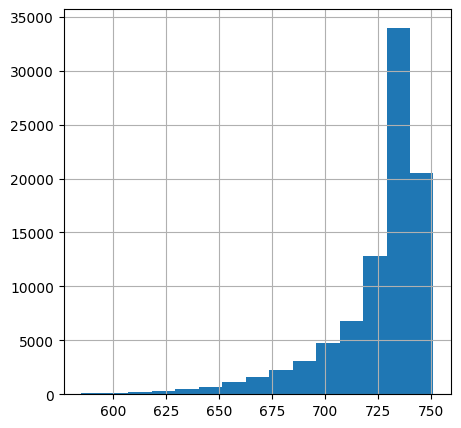

In [53]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Credit Score'].hist(bins=15, figsize=(5, 5) )
plt.show()

In [54]:
df_duplicates_removed['Credit Score'].skew()

-2.052721923565222

BIVARIATE ANALYSIS WITH DEPENDANT VARIABLE

<Axes: xlabel='Credit Score', ylabel='Count'>

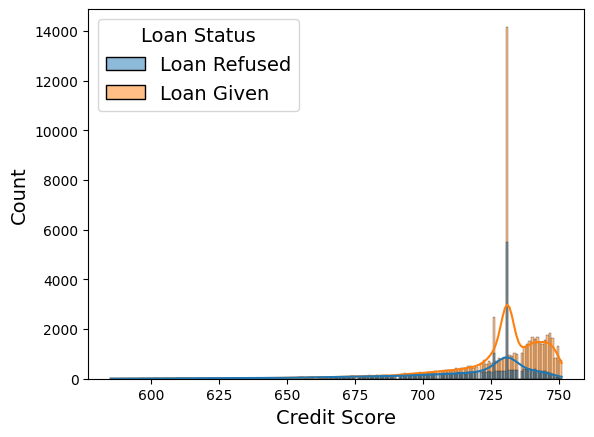

In [55]:
sns.histplot(data=df_duplicates_removed,x = df_duplicates_removed['Credit Score'],kde=True,hue='Loan Status')

Insights: From the above trend we can see that as the credit score is increasing there is reduction in loan rejection

<h5>4.2.4 Years in current job

- How is Years in current job distributed?
- How does Years in current job impacts loan status?

HANDELING NULL VALUES

In [56]:
df_duplicates_removed['Years in current job'].isnull().sum()

3817

We dont have any feature which can relate to years in current job. Hence we are filling the NA values with mode of year in current job

In [57]:
years_in_current_job_mode = df_duplicates_removed['Years in current job'].mode()[0]

In [58]:
years_in_current_job_mode

'10+ years'

In [59]:
df_duplicates_removed['Years in current job'].fillna(years_in_current_job_mode,inplace=True)

In [60]:
df_duplicates_removed['Years in current job'].isnull().sum()

0

UNIVARIATE ANALYSIS

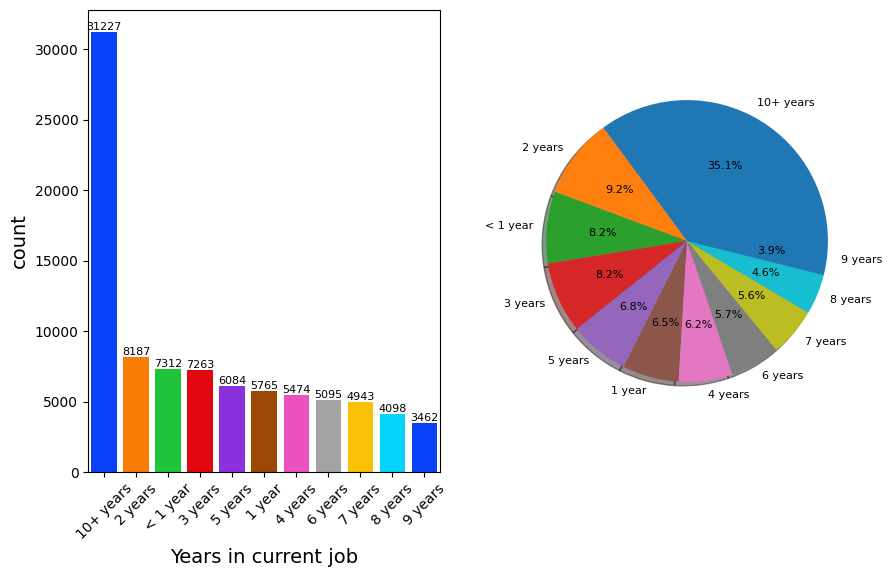

In [61]:
f,ax = plt.subplots(1,2,figsize = (10,6))
sns.countplot(x= df_duplicates_removed['Years in current job'],data = df_duplicates_removed,palette = 'bright',ax=ax[0],saturation=0.95,order = df_duplicates_removed['Years in current job'].value_counts().index)
ax[0].tick_params(axis='x', rotation=45)
for container in ax[0].containers:
    ax[0].bar_label(container,color = 'black',size=8)

plt.pie(x=df_duplicates_removed['Years in current job'].value_counts(),labels=df_duplicates_removed['Years in current job'].value_counts().index,autopct='%1.1f%%',shadow=True,textprops={'fontsize': 8})
plt.show()

Insights: 35.1% of the applicants have 10+ years of working experience.
0-3 years of working experience have 26.7% share for loan application.

BIVARIATE ANALYSIS WITH DEPENDANT FEATURE

In [62]:
years_in_current_job_crosstabs = pd.crosstab(df_duplicates_removed['Loan Status'], df_duplicates_removed['Years in current job'])


percentages_years_in_current_job = years_in_current_job_crosstabs.div(years_in_current_job_crosstabs.sum(axis=0), axis=1) * 100

print("Percentage cross-tabulation:")
print(percentages_years_in_current_job)


Percentage cross-tabulation:
Years in current job     1 year  10+ years   2 years    3 years    4 years  \
Loan Status                                                                  
Loan Given            71.084128  71.652736  72.88384  72.931296  71.720862   
Loan Refused          28.915872  28.347264  27.11616  27.068704  28.279138   

Years in current job    5 years   6 years    7 years   8 years    9 years  \
Loan Status                                                                 
Loan Given            71.959237  71.24632  70.969047  71.25427  70.132871   
Loan Refused          28.040763  28.75368  29.030953  28.74573  29.867129   

Years in current job   < 1 year  
Loan Status                      
Loan Given            71.252735  
Loan Refused          28.747265  


Insights: There is no relation between Years in current job and loan status. as we can see loan given vs loan refused %age is very similar to to all  year groups

<h5>4.2.5 Home Ownership

- How is Home Ownership Distributed?
- How much Home Ownership impacts Loan Status?

In [63]:
df_duplicates_removed['Home Ownership'].value_counts()

Home Mortgage    43270
Rent             37395
Own Home          8075
HaveMortgage       170
Name: Home Ownership, dtype: int64

We can see there are tw0 different classes for Home Mortgage and Have Mortgate. Lets fix this

In [64]:
df_duplicates_removed['Home Ownership'] = df_duplicates_removed['Home Ownership'].str.replace('HaveMortgage','Home Mortgage',regex=True)

In [65]:
df_duplicates_removed['Home Ownership'].value_counts()

Home Mortgage    43440
Rent             37395
Own Home          8075
Name: Home Ownership, dtype: int64

UNIVARIATE ANALYSIS

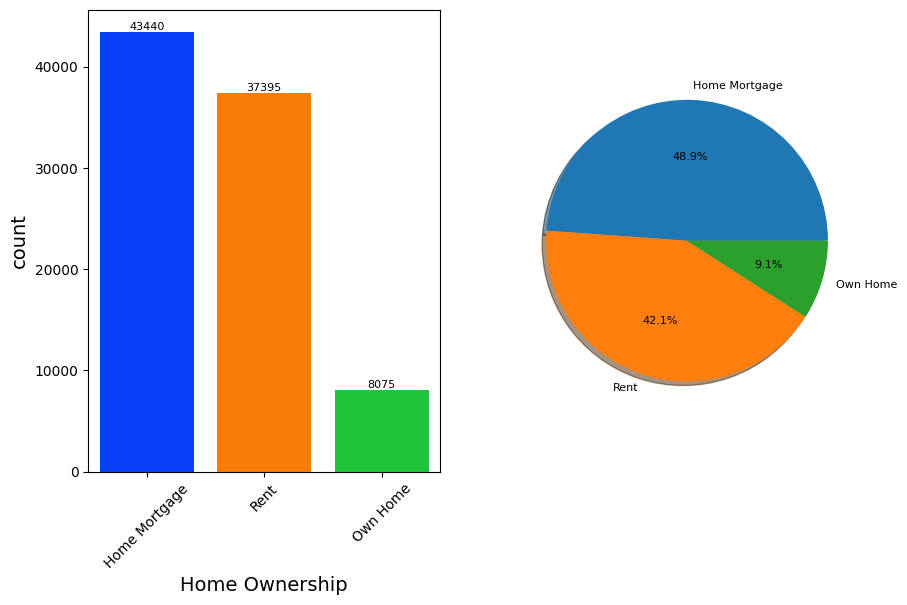

In [66]:
f,ax = plt.subplots(1,2,figsize = (10,6))
sns.countplot(x= df_duplicates_removed['Home Ownership'],data = df_duplicates_removed,palette = 'bright',ax=ax[0],saturation=0.95,order = df_duplicates_removed['Home Ownership'].value_counts().index)
ax[0].tick_params(axis='x', rotation=45)
for container in ax[0].containers:
    ax[0].bar_label(container,color = 'black',size=8)

plt.pie(x=df_duplicates_removed['Home Ownership'].value_counts(),labels=df_duplicates_removed['Home Ownership'].value_counts().index,autopct='%1.1f%%',shadow=True,textprops={'fontsize': 8})
plt.show()

In [67]:
home_ownership_crosstabs = pd.crosstab(df_duplicates_removed['Loan Status'], df_duplicates_removed['Home Ownership'])


percentages_home_ownership = home_ownership_crosstabs.div(home_ownership_crosstabs.sum(axis=0), axis=1) * 100

print("Percentage cross-tabulation:")
print(percentages_home_ownership)


Percentage cross-tabulation:
Home Ownership  Home Mortgage   Own Home       Rent
Loan Status                                        
Loan Given          74.523481  71.058824  68.527878
Loan Refused        25.476519  28.941176  31.472122


There is no such relation between home ownership vs loan status. But we ca see there is increase in loan refused cases where home ownership is not there.

<h5>4.2.6 Annual Income

- How is annual income distributed?
- How does annual income impacts loan status?

Checking for null values

In [68]:
df_duplicates_removed['Annual Income'].isnull().sum()

21338

We have 20% of data where Annual income is not present. We will impute these in the end.

Outliers Handeling

<Axes: xlabel='Annual Income'>

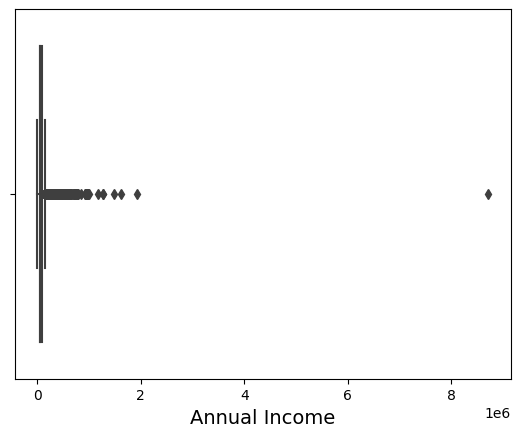

In [69]:
sns.boxplot(data=df_duplicates_removed,x='Annual Income')

In [70]:
df_duplicates_removed['Annual Income'].describe()

count    6.757200e+04
mean     7.234575e+04
std      5.836101e+04
min      4.033000e+03
25%      4.458600e+04
50%      6.149400e+04
75%      8.675025e+04
max      8.713547e+06
Name: Annual Income, dtype: float64

In [71]:
df_duplicates_removed['Annual Income'].quantile([0.0,0.2,0.5,0.75,0.8,0.9,0.95,0.99,0.995,0.999,0.9999])

0.0000       4033.000
0.2000      40764.000
0.5000      61494.000
0.7500      86750.250
0.8000      94600.800
0.9000     119916.000
0.9500     147645.000
0.9900     239286.960
0.9950     296831.020
0.9990     491575.770
0.9999    1044848.308
Name: Annual Income, dtype: float64

We can see the Annual Income ranges from 4000 to 1040000. We ahve quite an outliers after 99 percentile. We will replace the 15 outliers with values present at 99 percentile.

In [72]:
df_duplicates_removed.loc[df_duplicates_removed['Annual Income']>239286,'Annual Income'] = 239286

<Axes: xlabel='Annual Income'>

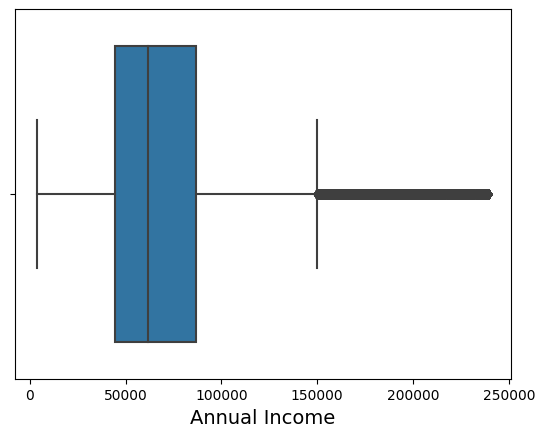

In [73]:
sns.boxplot(data=df_duplicates_removed,x='Annual Income')

UNIVARIATE ANALYSIS

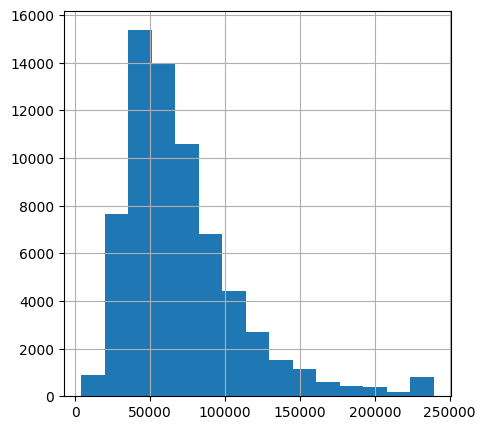

In [74]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Annual Income'].hist(bins=15, figsize=(5, 5) )
plt.show()

BIVARIATE ANALYSIS

<Axes: xlabel='Annual Income', ylabel='Count'>

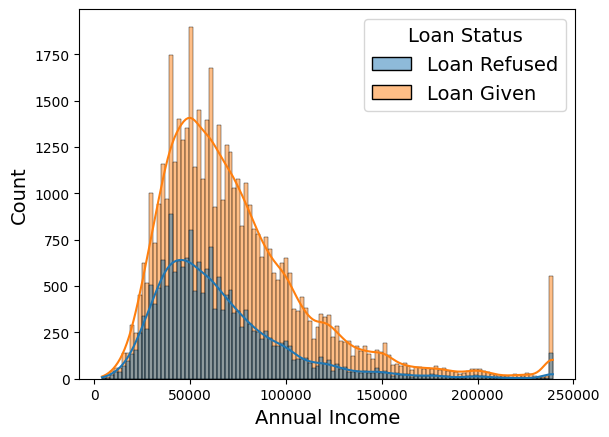

In [75]:
sns.histplot(data=df_duplicates_removed,x = df_duplicates_removed['Annual Income'],kde=True,hue='Loan Status')

Text(0.5, 0.98, '')

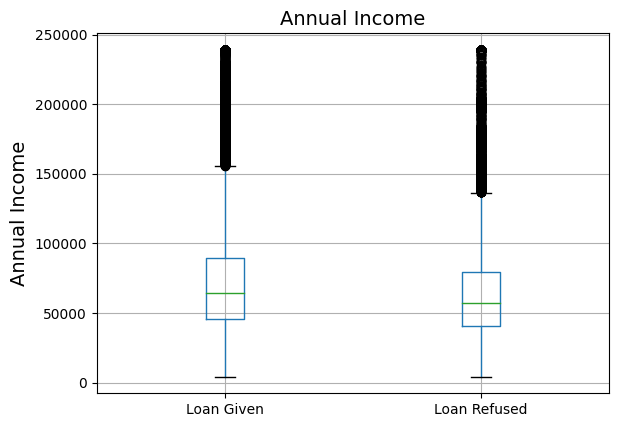

In [76]:
annual_income_loan_staus_boxplot = df_duplicates_removed.boxplot(by='Loan Status', column='Annual Income')
annual_income_loan_staus_boxplot.set_xlabel('')
annual_income_loan_staus_boxplot.set_ylabel('Annual Income')
plt.suptitle('')

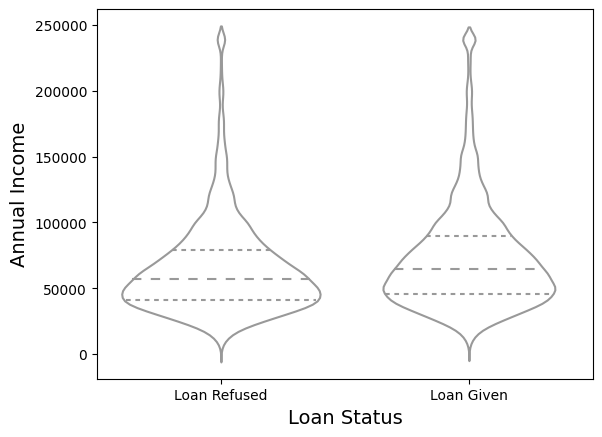

In [77]:
annual_income_loan_staus_voilinplot = sns.violinplot(x = df_duplicates_removed['Loan Status'],y = df_duplicates_removed['Annual Income'],inner = 'quartile',color = 'white')
plt.show()

Insights: Median Annual Income of loan refusal is slightly less than that of loan given. But the density of loan resusal(no. of loan refusal) at median is much higher than that of loan given

<h5>4.2.7 Purpose

- How is Purpose distributed?
- How does purpose impact loan status?

In [78]:
df_duplicates_removed['Purpose'].value_counts()

Debt Consolidation      70447
Home Improvements        5206
other                    4917
Other                    2850
Business Loan            1328
Buy a Car                1196
Medical Bills             955
Buy House                 559
Take a Trip               454
major_purchase            344
small_business            248
moving                    124
wedding                    99
Educational Expenses       92
vacation                   82
renewable_energy            9
Name: Purpose, dtype: int64

We can observe that for Other there are 2 classes. weill replace other with Other for uniformity

In [79]:
df_duplicates_removed.loc[df_duplicates_removed['Purpose']=='other','Purpose'] = 'Other'

In [80]:
df_duplicates_removed['Purpose'].value_counts()

Debt Consolidation      70447
Other                    7767
Home Improvements        5206
Business Loan            1328
Buy a Car                1196
Medical Bills             955
Buy House                 559
Take a Trip               454
major_purchase            344
small_business            248
moving                    124
wedding                    99
Educational Expenses       92
vacation                   82
renewable_energy            9
Name: Purpose, dtype: int64

UNIVARIATE ANALYSIS

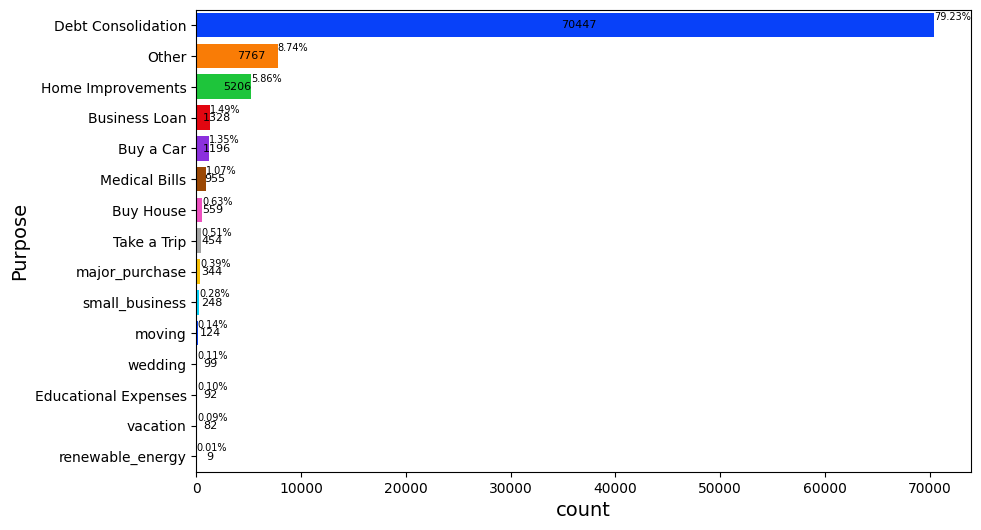

In [81]:

plt.figure(figsize=(10, 6))


ax = sns.countplot(y='Purpose', data=df_duplicates_removed, palette='bright', saturation=0.95, order=df_duplicates_removed['Purpose'].value_counts().index)
ax.tick_params(axis='y', rotation=0)


for container in ax.containers:
    ax.bar_label(container, color='black', label_type='center', fontsize=8, padding=10)


total = float(len(df_duplicates_removed))

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 6, p.get_y() + p.get_height() / 6., '{:.2f}%'.format((width / total) * 100), va="center",size=7)

plt.show()


BIVARIATE ANALYSIS WITH LOAN STATUS

In [82]:
purpose_crosstabs = pd.crosstab(df_duplicates_removed['Loan Status'], df_duplicates_removed['Purpose'])


percentages_purpose = purpose_crosstabs.div(purpose_crosstabs.sum(axis=0), axis=1) * 100

print("Percentage cross-tabulation:")
print(percentages_purpose)

Percentage cross-tabulation:
Purpose       Business Loan  Buy House  Buy a Car  Debt Consolidation  \
Loan Status                                                             
Loan Given        59.864458  71.556351  80.434783           71.726262   
Loan Refused      40.135542  28.443649  19.565217           28.273738   

Purpose       Educational Expenses  Home Improvements  Medical Bills  \
Loan Status                                                            
Loan Given               77.173913          75.105647      67.434555   
Loan Refused             22.826087          24.894353      32.565445   

Purpose           Other  Take a Trip  major_purchase     moving  \
Loan Status                                                       
Loan Given    71.172911    72.907489        71.22093  60.483871   
Loan Refused  28.827089    27.092511        28.77907  39.516129   

Purpose       renewable_energy  small_business   vacation    wedding  
Loan Status                                      

Insights : for 9 out 12 purpose approximate loan given %age is 70%. To buy a car the approval rate is much higher(80%) than any other category

<h5>4.2.8 Monthly Debt

- How is monthly debt distributed?
- How Monthly Debt impact Loan Status

In [83]:
df_duplicates_removed['Monthly Debt'].isnull().sum()

23374

Null values will be imputed in the end

In [84]:
df_duplicates_removed.groupby('Number of Open Accounts')['Monthly Debt'].median()

Number of Open Accounts
0       35.390
1       54.440
2      148.260
3      253.020
4      379.800
5      479.260
6      564.605
7      656.835
8      730.370
9      794.160
10     841.080
11     923.490
12     972.700
13    1014.795
14    1038.820
15    1084.390
16    1163.005
17    1159.190
18    1215.690
19    1227.280
20    1228.390
21    1308.610
22    1356.210
23    1298.550
24    1303.320
25    1331.720
26    1426.455
27    1325.960
28    1355.080
29    1415.590
30    1491.240
31    1117.880
32    1334.240
33    1322.770
34    1553.810
35    1797.915
36    1634.345
37    1562.690
38     951.595
39    1496.900
40    1061.060
41    2014.350
42    1874.210
43    1852.030
44    1412.040
45    2205.480
47    4187.530
48    2056.560
52     389.880
55         NaN
56    1893.920
76    1613.930
Name: Monthly Debt, dtype: float64

We can see that as number of open accounts increases monthly debt also increases. We will inpute these numbers to null values.

In [85]:
median_monthly_debt_by_accounts = df_duplicates_removed.groupby('Number of Open Accounts')['Monthly Debt'].transform('median')

df_duplicates_removed['Monthly Debt'] = df_duplicates_removed['Monthly Debt'].fillna(median_monthly_debt_by_accounts)


UNIVARIATE ANALYSIS

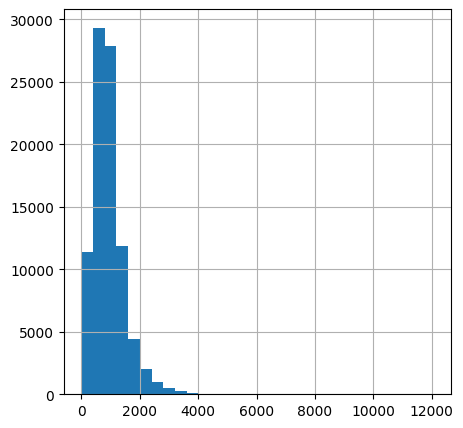

In [86]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Monthly Debt'].hist(bins=30, figsize=(5, 5) )
plt.show()

there seems to be outliers in the data that are very large compared to median values. We will treat them

In [87]:
df_duplicates_removed['Monthly Debt'].quantile([0.0,0.2,0.5,0.75,0.8,0.9,0.95,0.99,0.995,0.999,0.9999,0.99999,1])

0.00000        0.000000
0.20000      517.384000
0.50000      841.080000
0.75000     1163.005000
0.80000     1241.912000
0.90000     1577.356000
0.95000     1947.144000
0.99000     2885.491600
0.99500     3328.567200
0.99900     4623.220360
0.99990     7372.974900
0.99999    10967.419408
1.00000    12055.680000
Name: Monthly Debt, dtype: float64

Fromm 99.9 %tile  there is a steep increase in Monthly Debt. we will replace all the values after 99.9 %tile to 4624.

In [88]:
df_duplicates_removed.loc[df_duplicates_removed['Monthly Debt']>4623, 'Monthly Debt'] = 4624

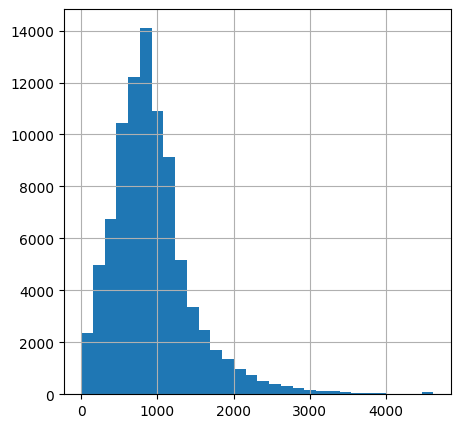

In [89]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Monthly Debt'].hist(bins=30, figsize=(5, 5) )
plt.show()

BIVARIATE ANALYSIS WITH LOAN STATUS

Text(0.5, 0.98, '')

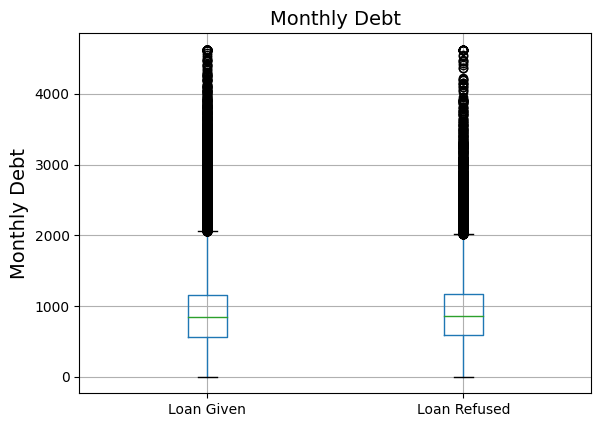

In [90]:
monthly_debt_loan_staus_boxplot = df_duplicates_removed.boxplot(by='Loan Status', column='Monthly Debt')
monthly_debt_loan_staus_boxplot.set_xlabel('')
monthly_debt_loan_staus_boxplot.set_ylabel('Monthly Debt')
plt.suptitle('')

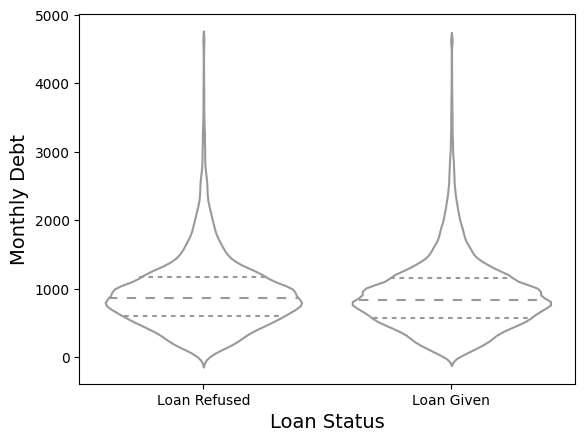

In [91]:
monthly_debt_loan_staus_voilinplot = sns.violinplot(x = df_duplicates_removed['Loan Status'],y = df_duplicates_removed['Monthly Debt'],inner = 'quartile',color = 'white')
plt.show()

<Axes: xlabel='Monthly Debt', ylabel='Count'>

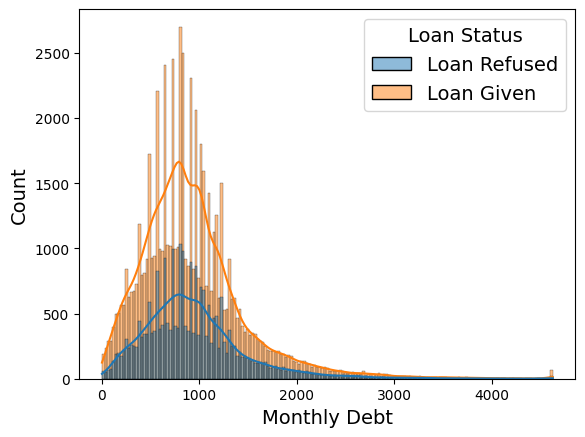

In [92]:
sns.histplot(data=df_duplicates_removed,x = df_duplicates_removed['Monthly Debt'],kde=True,hue='Loan Status')

Insights: No ductible relationships found here.

<h5>4.2.9 Years in Credit History

- How is Years in credit history distributed?
- How does years in credit history impacts loans status?


In [93]:
df_duplicates_removed['Years of Credit History'].isnull().sum()

0

No null values found

In [94]:
df_duplicates_removed['Years of Credit History'].value_counts()

16.0    1234
15.0    1159
17.0    1091
16.5    1045
14.0    1031
        ... 
51.6       1
59.5       1
62.5       1
65.0       1
51.3       1
Name: Years of Credit History, Length: 508, dtype: int64

In [95]:
df_duplicates_removed['Years of Credit History'].describe()

count    88910.000000
mean        18.315313
std          7.049175
min          3.600000
25%         13.500000
50%         17.000000
75%         21.800000
max         70.500000
Name: Years of Credit History, dtype: float64

UNIVARIATE ANALYSIS

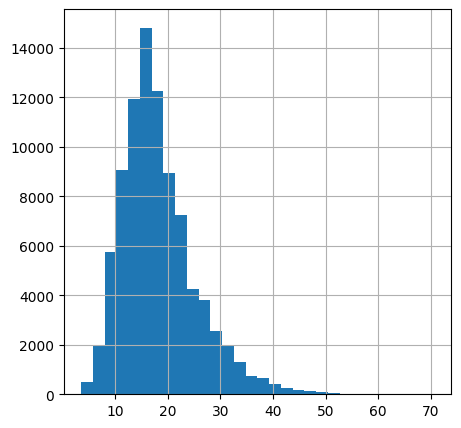

In [96]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Years of Credit History'].hist(bins=30, figsize=(5, 5) )
plt.show()

BIVARIATE ANALYSIS WITH LOAN STATUS

Text(0.5, 0.98, '')

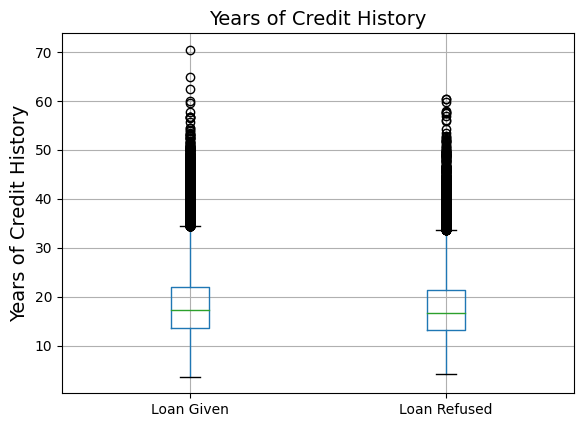

In [97]:
years_credit_history_loan_staus_boxplot = df_duplicates_removed.boxplot(by='Loan Status', column='Years of Credit History')
years_credit_history_loan_staus_boxplot.set_xlabel('')
years_credit_history_loan_staus_boxplot.set_ylabel('Years of Credit History')
plt.suptitle('')

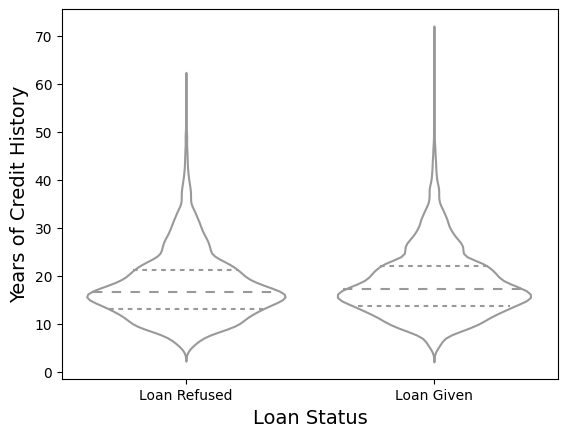

In [98]:
credit_history_loan_staus_voilinplot = sns.violinplot(x = df_duplicates_removed['Loan Status'],y = df_duplicates_removed['Years of Credit History'],inner = 'quartile',color = 'white')
plt.show()

<Axes: xlabel='Years of Credit History', ylabel='Count'>

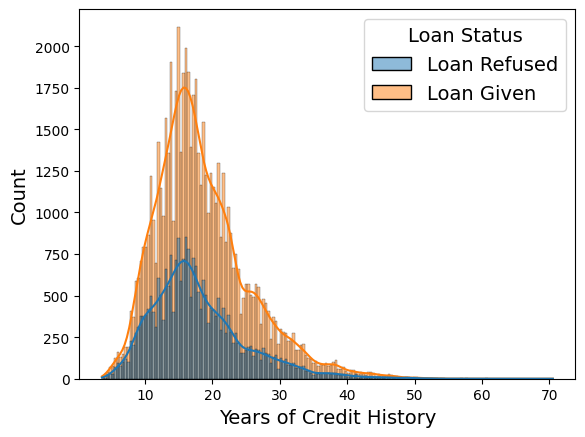

In [99]:
sns.histplot(data=df_duplicates_removed,x = df_duplicates_removed['Years of Credit History'],kde=True,hue='Loan Status')

Insights: Applications with loangers credit history where given loans.

<h5>4.2.10 Month since last delinquent

- How is Month since last delinquent distributed?
- How does monthsince last delinquent impacts loan status?

In [100]:
df_duplicates_removed['Months since last delinquent'].isnull().sum()

48506

Nearly 50% of the data is missing.

UNIVARIATE ANALYSIS

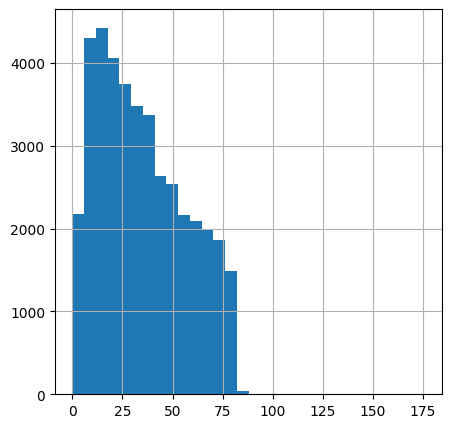

In [101]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Months since last delinquent'].hist(bins=30, figsize=(5, 5) )
plt.show()

BIVARIATE ANALYSIS

Text(0.5, 0.98, '')

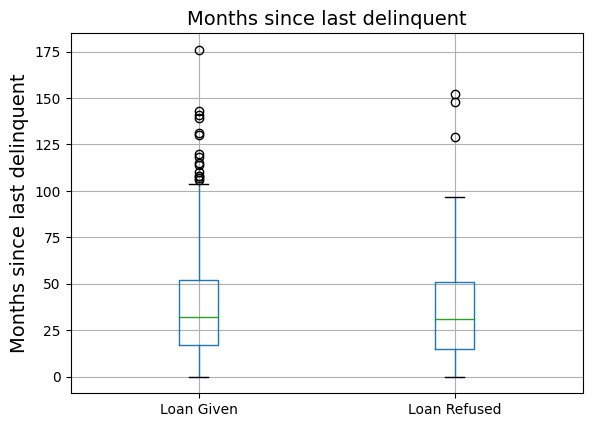

In [102]:
delinquent_loan_staus_boxplot = df_duplicates_removed.boxplot(by='Loan Status', column='Months since last delinquent')
delinquent_loan_staus_boxplot.set_xlabel('')
delinquent_loan_staus_boxplot.set_ylabel('Months since last delinquent')
plt.suptitle('')

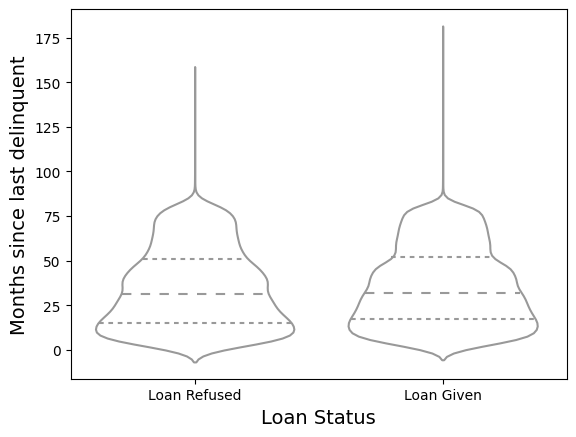

In [103]:
delinquent_months_loan_staus_voilinplot = sns.violinplot(x = df_duplicates_removed['Loan Status'],y = df_duplicates_removed['Months since last delinquent'],inner = 'quartile',color = 'white')
plt.show()

Applicants delinquent in recent months have more tendency to loan rejection than with applicants who delinquent much earlier

<h5>4.2.11 Number of Open Accounts

- How is Number of Open Account Distributed?
- How Number of Open accounts impacts loan status?

Outliers Handeling

In [104]:
df_duplicates_removed['Number of Open Accounts'].describe()

count    88910.000000
mean        11.110348
std          4.978461
min          0.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         76.000000
Name: Number of Open Accounts, dtype: float64

In [105]:
df_duplicates_removed['Number of Open Accounts'].quantile([0.0,0.5,0.75,0.9,0.95,0.99,0.999,0.9999,1])

0.0000     0.0
0.5000    10.0
0.7500    14.0
0.9000    18.0
0.9500    20.0
0.9900    26.0
0.9990    36.0
0.9999    47.0
1.0000    76.0
Name: Number of Open Accounts, dtype: float64

We will replace values greater than 99.9%tile to value at 99.9 percentile

In [106]:
df_duplicates_removed.loc[df_duplicates_removed['Number of Open Accounts']>36,'Number of Open Accounts'] = 36

UNIVARIATE ANALYSIS

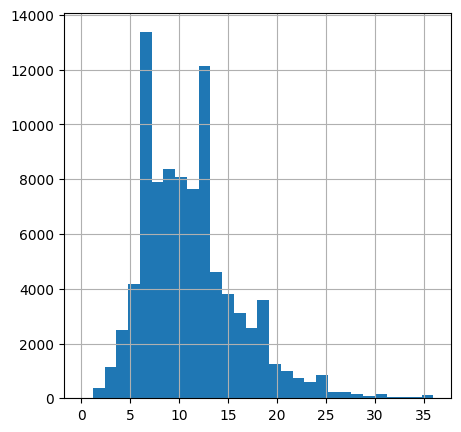

In [107]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Number of Open Accounts'].hist(bins=30, figsize=(5, 5) )
plt.show()

BIVARIATE ANALYSIS WITH LOAN STATUS

Text(0.5, 0.98, '')

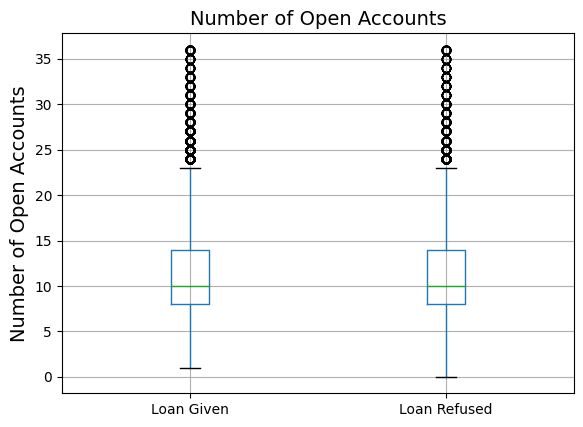

In [108]:
open_account_loan_staus_boxplot = df_duplicates_removed.boxplot(by='Loan Status', column='Number of Open Accounts')
open_account_loan_staus_boxplot.set_xlabel('')
open_account_loan_staus_boxplot.set_ylabel('Number of Open Accounts')
plt.suptitle('')

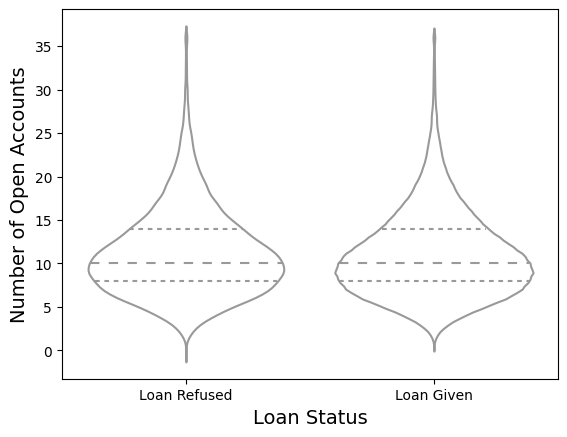

In [109]:
open_account_loan_staus_voilinplot = sns.violinplot(x = df_duplicates_removed['Loan Status'],y = df_duplicates_removed['Number of Open Accounts'],inner = 'quartile',color = 'white')
plt.show()

Insights: We can see if number of open accounts is 0 then loan application will be rejected

<h5>4.2.12 Number of Credit Problems

- How is number of credit problems distributed?
- How does number of credit problem  impacts loan status?

UNIVARIATE ANALYSIS

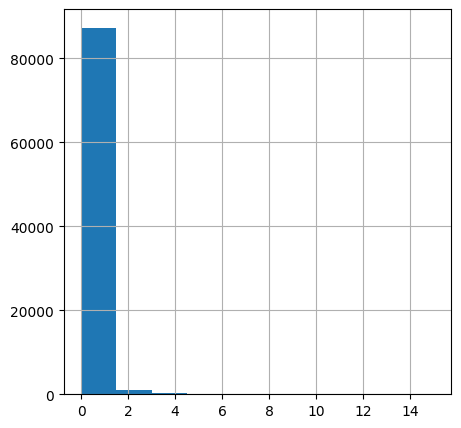

In [110]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Number of Credit Problems'].hist(bins=10, figsize=(5, 5) )
plt.show()

BIVARIATE ANALYSIS WITH LOAN STATUS

Text(0.5, 0.98, '')

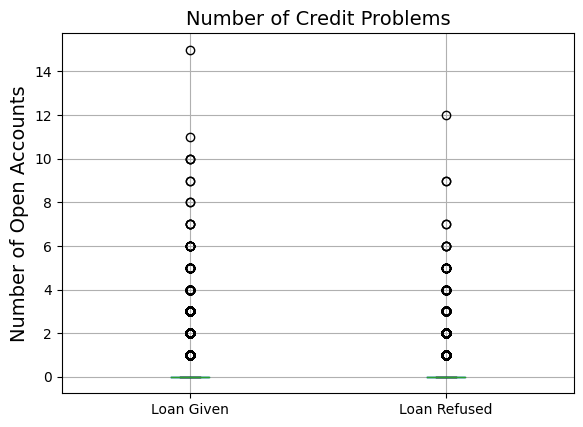

In [111]:
credit_problemt_loan_staus_boxplot = df_duplicates_removed.boxplot(by='Loan Status', column='Number of Credit Problems')
credit_problemt_loan_staus_boxplot.set_xlabel('')
credit_problemt_loan_staus_boxplot.set_ylabel('Number of Open Accounts')
plt.suptitle('')

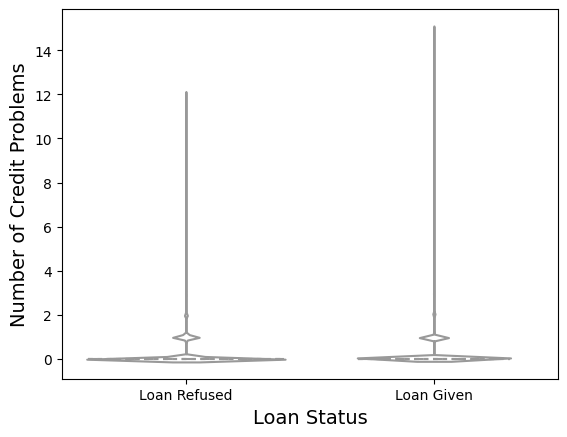

In [112]:
credit_problems_loan_staus_voilinplot = sns.violinplot(x = df_duplicates_removed['Loan Status'],y = df_duplicates_removed['Number of Credit Problems'],inner = 'quartile',color = 'white')
plt.show()

Insights: We can see for loan refused density of applicants with0 credit problems is much higher than for applicants whose loan was approved. 

<h5>4.2.13 Current Credit Balance

- How is current credit balance distributed?
- How does current credit balance impacts loan status?

In [113]:
df_duplicates_removed['Current Credit Balance'].describe()

count    8.891000e+04
mean     1.543593e+04
std      1.965873e+04
min      0.000000e+00
25%      5.949000e+03
50%      1.103900e+04
75%      1.930100e+04
max      1.730472e+06
Name: Current Credit Balance, dtype: float64

In [114]:
df_duplicates_removed['Current Credit Balance'].quantile([0.0,0.5,0.75,0.9,0.95,0.99,0.999,0.9999,1])

0.0000    0.000000e+00
0.5000    1.103900e+04
0.7500    1.930100e+04
0.9000    3.084350e+04
0.9500    3.993330e+04
0.9900    8.100719e+04
0.9990    2.276700e+05
0.9999    4.086732e+05
1.0000    1.730472e+06
Name: Current Credit Balance, dtype: float64

In [115]:
# Define labels for quantiles
quantile_labels = ['0.0000', '0.5000', '0.7500', '0.9000', '0.9500', '0.9900', '0.9990', '0.9999', '1.0000']

# Get the quantiles
quantiles = df_duplicates_removed['Current Credit Balance'].quantile([0.0, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999, 0.9999, 1])

# Convert exponential numbers to decimal format with 2 decimal places and include labels
formatted_quantiles = ["{}: {:.2f}".format(label, value) for label, value in zip(quantile_labels, quantiles)]

df_formated_quantile = pd.DataFrame(formatted_quantiles)

df_formated_quantile


,0
0,0.0000: 0.00
1,0.5000: 11039.00
2,0.7500: 19301.00
3,0.9000: 30843.50
4,0.9500: 39933.30
5,0.9900: 81007.19
6,0.9990: 227670.03
7,0.9999: 408673.25
8,1.0000: 1730472.00


We can see there are large value outliers after 99%ile. We will replace it with value at 99%ile

In [116]:
df_duplicates_removed.loc[df_duplicates_removed['Current Credit Balance']>81008,'Current Credit Balance'] = 81008

UNIVARIATE ANALYSIS

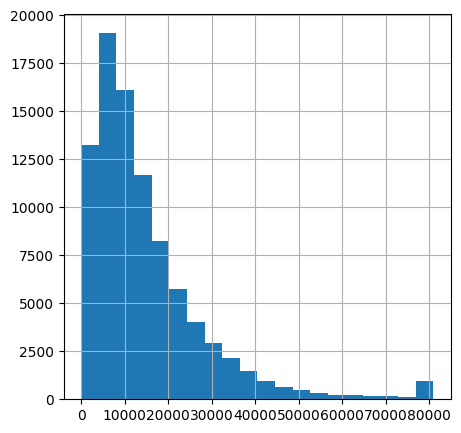

In [117]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Current Credit Balance'].hist(bins=20, figsize=(5, 5) )
plt.show()

BIVARIATE ANALYSIS WITH LOAN STATUS

Text(0.5, 0.98, '')

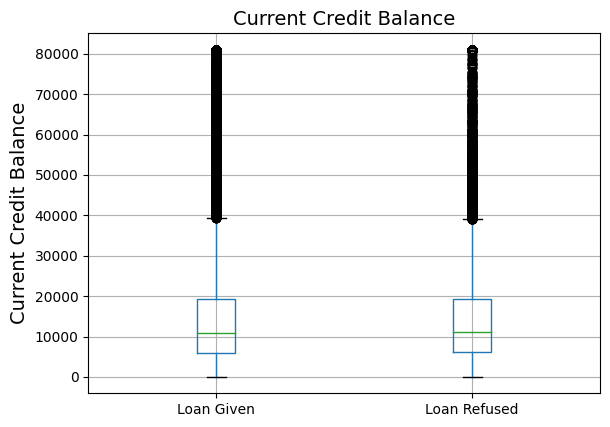

In [118]:
credit_balance_loan_staus_boxplot = df_duplicates_removed.boxplot(by='Loan Status', column='Current Credit Balance')
credit_balance_loan_staus_boxplot.set_xlabel('')
credit_balance_loan_staus_boxplot.set_ylabel('Current Credit Balance')
plt.suptitle('')

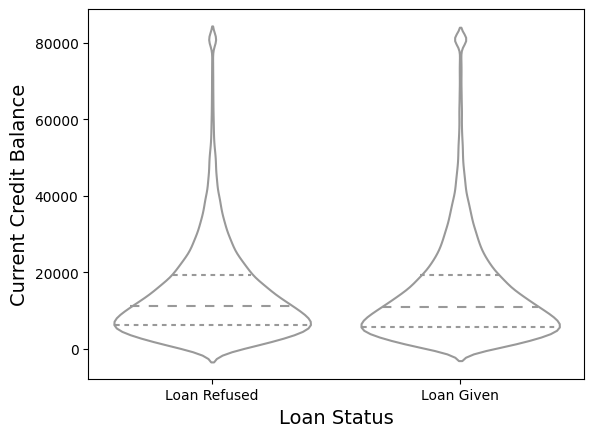

In [119]:
credit_balance_loan_staus_voilinplot = sns.violinplot(x = df_duplicates_removed['Loan Status'],y = df_duplicates_removed['Current Credit Balance'],inner = 'quartile',color = 'white')
plt.show()

<h5>4.2.14 Maximum Open Credit

- How Maximum Open Credit is distributed?
- How does Maximum open credit impacts loan status?


In [120]:
df_duplicates_removed['Maximum Open Credit'].isnull().sum()

2

In [123]:
df_duplicates_removed['Maximum Open Credit'].nunique()

46624

We will replace the null values with mean values

In [124]:
df_duplicates_removed['Maximum Open Credit'].fillna(df_duplicates_removed['Maximum Open Credit'].mean(),inplace=True)

UNIVARIATE ANALYSIS

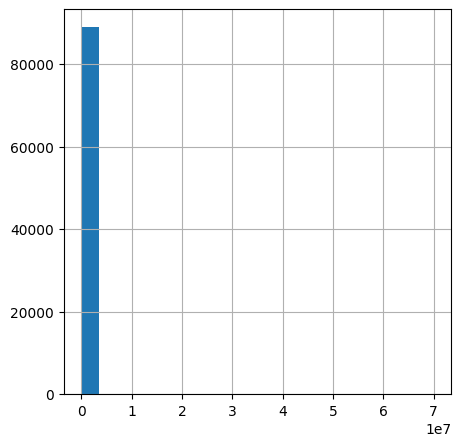

In [126]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Maximum Open Credit'].hist(bins=20, figsize=(5, 5) )
plt.show()

<Axes: xlabel='Maximum Open Credit', ylabel='Density'>

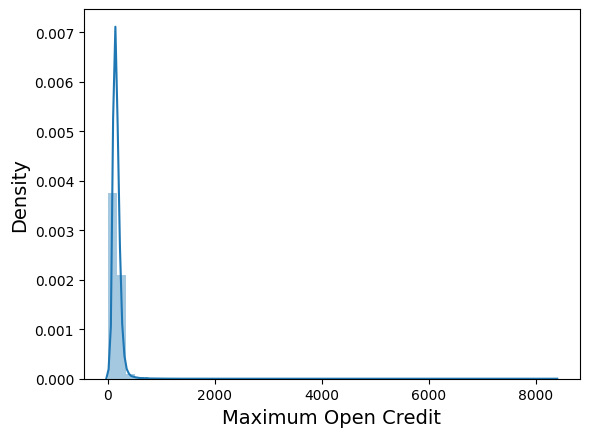

In [127]:
sns.distplot(df_duplicates_removed['Maximum Open Credit']**(1/2))

In [131]:
quantile_labels = ['0.0000', '0.5000', '0.7500', '0.9000', '0.9500', '0.9900', '0.9990', '0.9999', '1.0000']

# Get the quantiles
quantiles_1 = df_duplicates_removed['Maximum Open Credit'].quantile([0.0, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999, 0.9999, 1])

# Convert exponential numbers to decimal format with 2 decimal places and include labels
formatted_quantiles_1 = ["{} {:.2f}".format(label, value) for label, value in zip(quantile_labels, quantiles_1)]

df_formated_quantile_1 = pd.DataFrame(formatted_quantiles_1)

df_formated_quantile_1

,0
0,0.0000 0.00
1,0.5000 21781.50
2,0.7500 36367.00
3,0.9000 56956.50
4,0.9500 76600.80
5,0.9900 171423.91
6,0.9990 892297.26
7,0.9999 10894355.89
8,1.0000 69988086.00


There is huge markup in values after 99%ile. We will replace these values with value at 99%ile

In [132]:
df_duplicates_removed.loc[df_duplicates_removed['Maximum Open Credit']>171424,'Maximum Open Credit'] = 171424

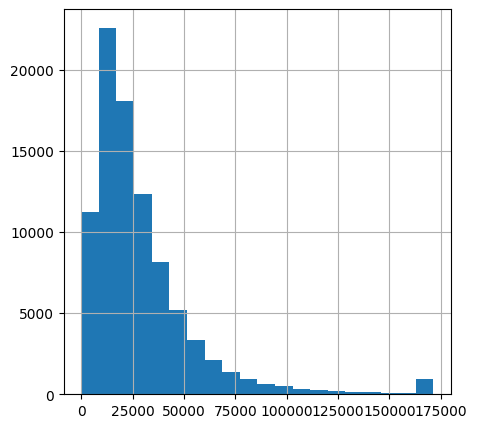

In [133]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Maximum Open Credit'].hist(bins=20, figsize=(5, 5) )
plt.show()

BIVARIATE ANALYSIS WITH LOAN STATUS

Text(0.5, 0.98, '')

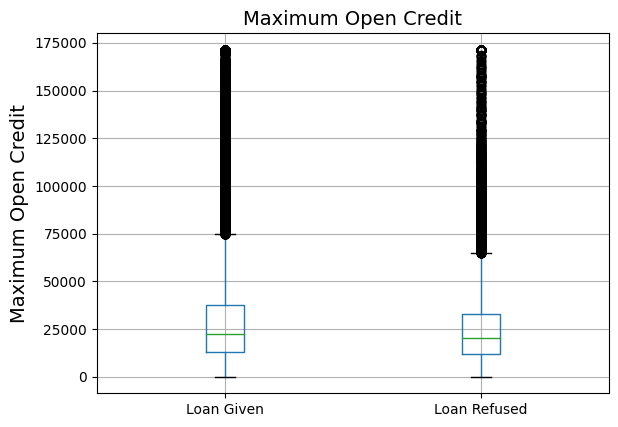

In [134]:
max_credit_loan_staus_boxplot = df_duplicates_removed.boxplot(by='Loan Status', column='Maximum Open Credit')
max_credit_loan_staus_boxplot.set_xlabel('')
max_credit_loan_staus_boxplot.set_ylabel('Maximum Open Credit')
plt.suptitle('')

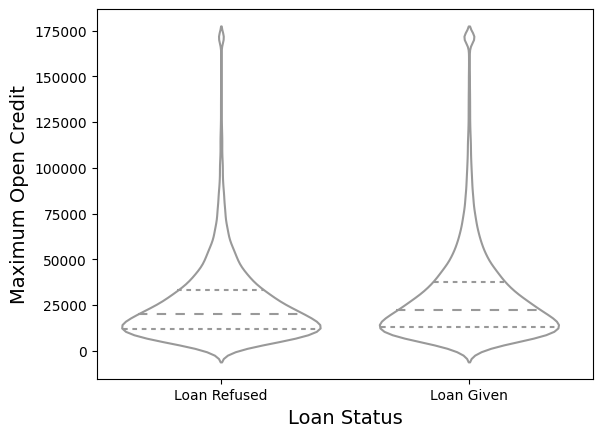

In [135]:
max_credit_loan_staus_voilinplot = sns.violinplot(x = df_duplicates_removed['Loan Status'],y = df_duplicates_removed['Maximum Open Credit'],inner = 'quartile',color = 'white')
plt.show()

Insights: There is higher density of loan rejection cases at 25% & 50 %percentile than at loan given.

<h5>4.2.15 Bankruptcies

- How Bankruptcies is distributed?
- How does Bankruptcies impacts loan status?


In [136]:
df_duplicates_removed['Bankruptcies'].value_counts()

0.0    79323
1.0     8936
2.0      353
3.0       80
4.0       19
5.0        5
7.0        1
6.0        1
Name: Bankruptcies, dtype: int64

In [137]:
df_duplicates_removed['Bankruptcies'].isnull().sum()

192

We will fill null vaules with median

In [139]:
df_duplicates_removed['Bankruptcies'].fillna(df_duplicates_removed['Bankruptcies'].median(),inplace=True)

UNIVARIATE ANALYSIS

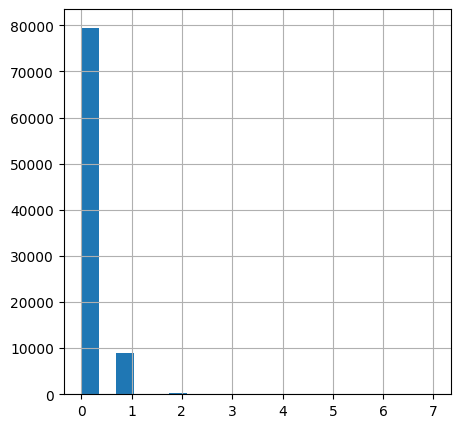

In [141]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Bankruptcies'].hist(bins=20, figsize=(5, 5) )
plt.show()

S WITH LOAN STATUS

BIVARIATE ANALYSIS WITH LOAN STATUS

Text(0.5, 0.98, '')

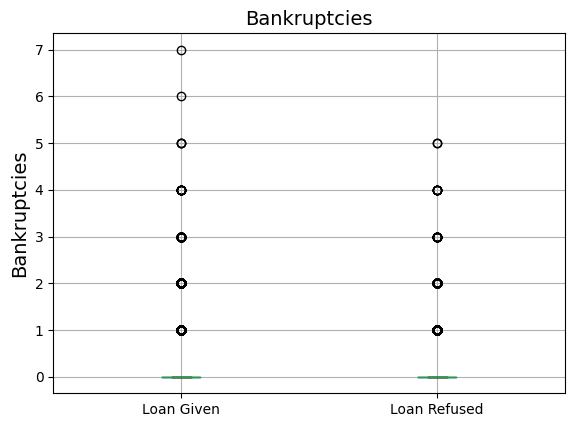

In [148]:
bankruptcy_loan_staus_boxplot = df_duplicates_removed.boxplot(by='Loan Status', column='Bankruptcies')
bankruptcy_loan_staus_boxplot.set_xlabel('')
bankruptcy_loan_staus_boxplot.set_ylabel('Bankruptcies')
plt.suptitle('')

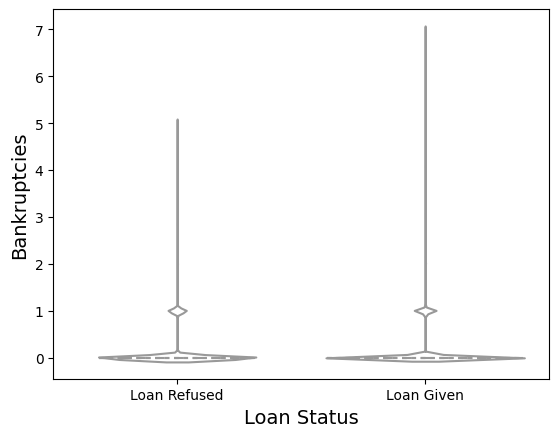

In [143]:
bankruptcies_loan_staus_voilinplot = sns.violinplot(x = df_duplicates_removed['Loan Status'],y = df_duplicates_removed['Bankruptcies'],inner = 'quartile',color = 'white')
plt.show()

Insights: Applicants with 0 Bankruptcies have higher chances of getting loan approved

<h5>4.2.16 Tax Liens

- How Tax Liens is distributed?
- How does Tax Liens impacts loan status?

In [144]:
df_duplicates_removed['Tax Liens'].isnull().sum()

8

We will replace null values with median

In [145]:
df_duplicates_removed['Tax Liens'].fillna(df_duplicates_removed['Tax Liens'].median(),inplace=True)

UNIVARIATE ANALYSIS

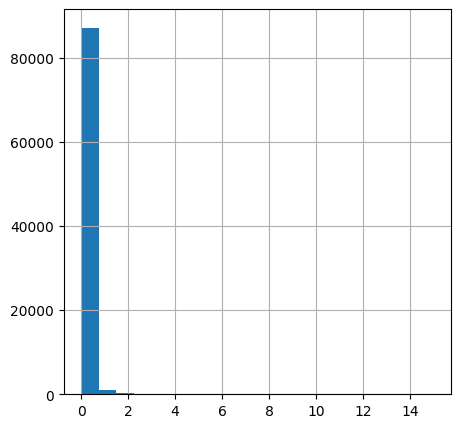

In [146]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Tax Liens'].hist(bins=20, figsize=(5, 5) )
plt.show()

BIVARIATE ANALYSIS WITH LOAN STATUS

Text(0.5, 0.98, '')

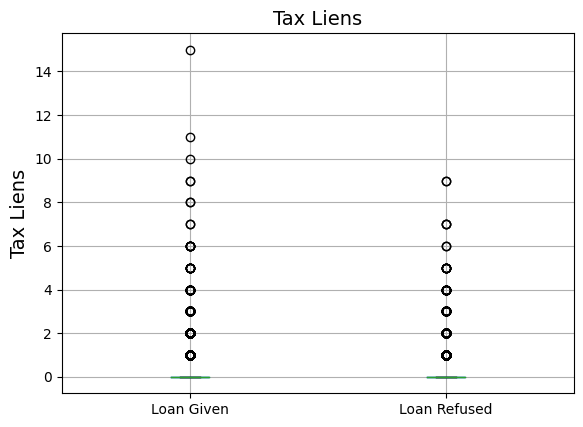

In [150]:
tax_loan_staus_boxplot = df_duplicates_removed.boxplot(by='Loan Status', column='Tax Liens')
tax_loan_staus_boxplot.set_xlabel('')
tax_loan_staus_boxplot.set_ylabel('Tax Liens')
plt.suptitle('')

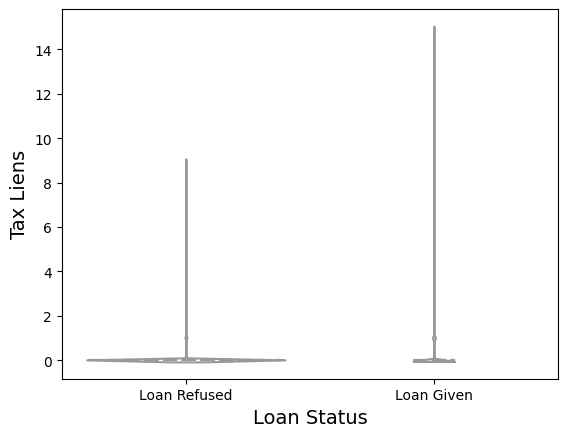

In [149]:
tax_loan_staus_voilinplot = sns.violinplot(x = df_duplicates_removed['Loan Status'],y = df_duplicates_removed['Tax Liens'],inner = 'quartile',color = 'white')
plt.show()

Insights: Applicants with 0 tax liens have very high chanches og getting loan rejected